In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [376]:
DH = pd.read_csv("BCD_HPSA_FCT_DET_DH.csv")

In [377]:
DH_NEW = DH.drop(columns = ['Data Warehouse Record Create Date','Data Warehouse Record Create Date Text','HPSA Withdrawn Date String','Withdrawn Date','HPSA Address','HPSA City','Unnamed: 64','Longitude','Latitude','BHCMIS Organization Identification Number','Common Postal Code','HPSA Component Source Identification Number','HPSA Postal Code','HPSA Resident Civilian Population'])

In [378]:
DH_NEW = DH_NEW.dropna()

In [405]:
MH = pd.read_csv("BCD_HPSA_FCT_DET_MH.csv")

In [406]:
MH_NEW = MH.drop(columns = ['Data Warehouse Record Create Date','Data Warehouse Record Create Date Text','HPSA Withdrawn Date String','Withdrawn Date','HPSA Address','HPSA City','Unnamed: 64','Longitude','Latitude','BHCMIS Organization Identification Number','Common Postal Code','HPSA Component Source Identification Number','HPSA Postal Code','HPSA Resident Civilian Population'])

In [407]:
MH_NEW = MH_NEW.dropna()

In [382]:
PC = pd.read_csv("BCD_HPSA_FCT_DET_PC.csv")

In [384]:
PC_NEW = PC.drop(columns = ['Data Warehouse Record Create Date','Data Warehouse Record Create Date Text',''Data Warehouse Record Create Date',HPSA Withdrawn Date String','Withdrawn Date','HPSA Address','HPSA City','Unnamed: 64','Longitude','Latitude','BHCMIS Organization Identification Number','Common Postal Code','HPSA Component Source Identification Number','HPSA Postal Code','HPSA Resident Civilian Population'])

SyntaxError: invalid syntax (32782099.py, line 1)

In [385]:
PC_NEW = PC_NEW.dropna()

In [386]:
data = pd.concat([PC_NEW,DH_NEW,MH_NEW])

In [387]:
data.to_csv("final_data.csv",index=False)

In [388]:
data.describe()

HPSA Score      HPSA FTE  HPSA Designation Population  \
count  64088.000000  64088.000000                 6.408800e+04   
mean      13.929269      8.040940                 1.001116e+05   
std        4.815569     13.502231                 1.132347e+05   
min        0.000000      0.010000                 0.000000e+00   
25%       12.000000      1.200000                 2.749600e+04   
50%       15.000000      3.850000                 6.828200e+04   
75%       17.000000      9.280000                 1.369860e+05   
max       26.000000    154.660000                 1.824707e+06   

       % of Population Below 100% Poverty  Common State FIPS Code  \
count                        64088.000000            64088.000000   
mean                            21.168141               27.051695   
std                              8.981721               15.542571   
min                              0.000000                1.000000   
25%                             14.400000               12.000000   
50%                             19.500000               27.000000   
75%                             26.900000               37.000000   
max                            100.000000               78.000000   

       Discipline Class Number  HPSA Estimated Served Population  \
count             64088.000000                      6.408800e+04   
mean                  3.839252                      4.435525e+04   
std                   2.768740                      8.362094e+04   
min                   1.000000                      3.000000e+01   
25%                   1.000000                      6.920000e+03   
50%                   6.000000                      1.908000e+04   
75%                   7.000000                      4.590000e+04   
max                   7.000000                      1.599800e+06   

       HPSA Estimated Underserved Population  HPSA Shortage  \
count                           6.408800e+04   64088.000000   
mean                            5.575632e+04      11.354207   
std                             8.456509e+04      12.419601   
min                            -1.397769e+06      -0.070000   
25%                             9.296000e+03       2.430000   
50%                             3.545800e+04       6.915000   
75%                             8.257900e+04      15.930000   
max                             9.347050e+05      84.300000   

       Primary State FIPS Code  State FIPS Code  
count             64088.000000     64088.000000  
mean                 27.049963        27.051695  
std                  15.544561        15.542571  
min                   1.000000         1.000000  
25%                  12.000000        12.000000  
50%                  27.000000        27.000000  
75%                  37.000000        37.000000  
max                  78.000000        78.000000

<AxesSubplot:>

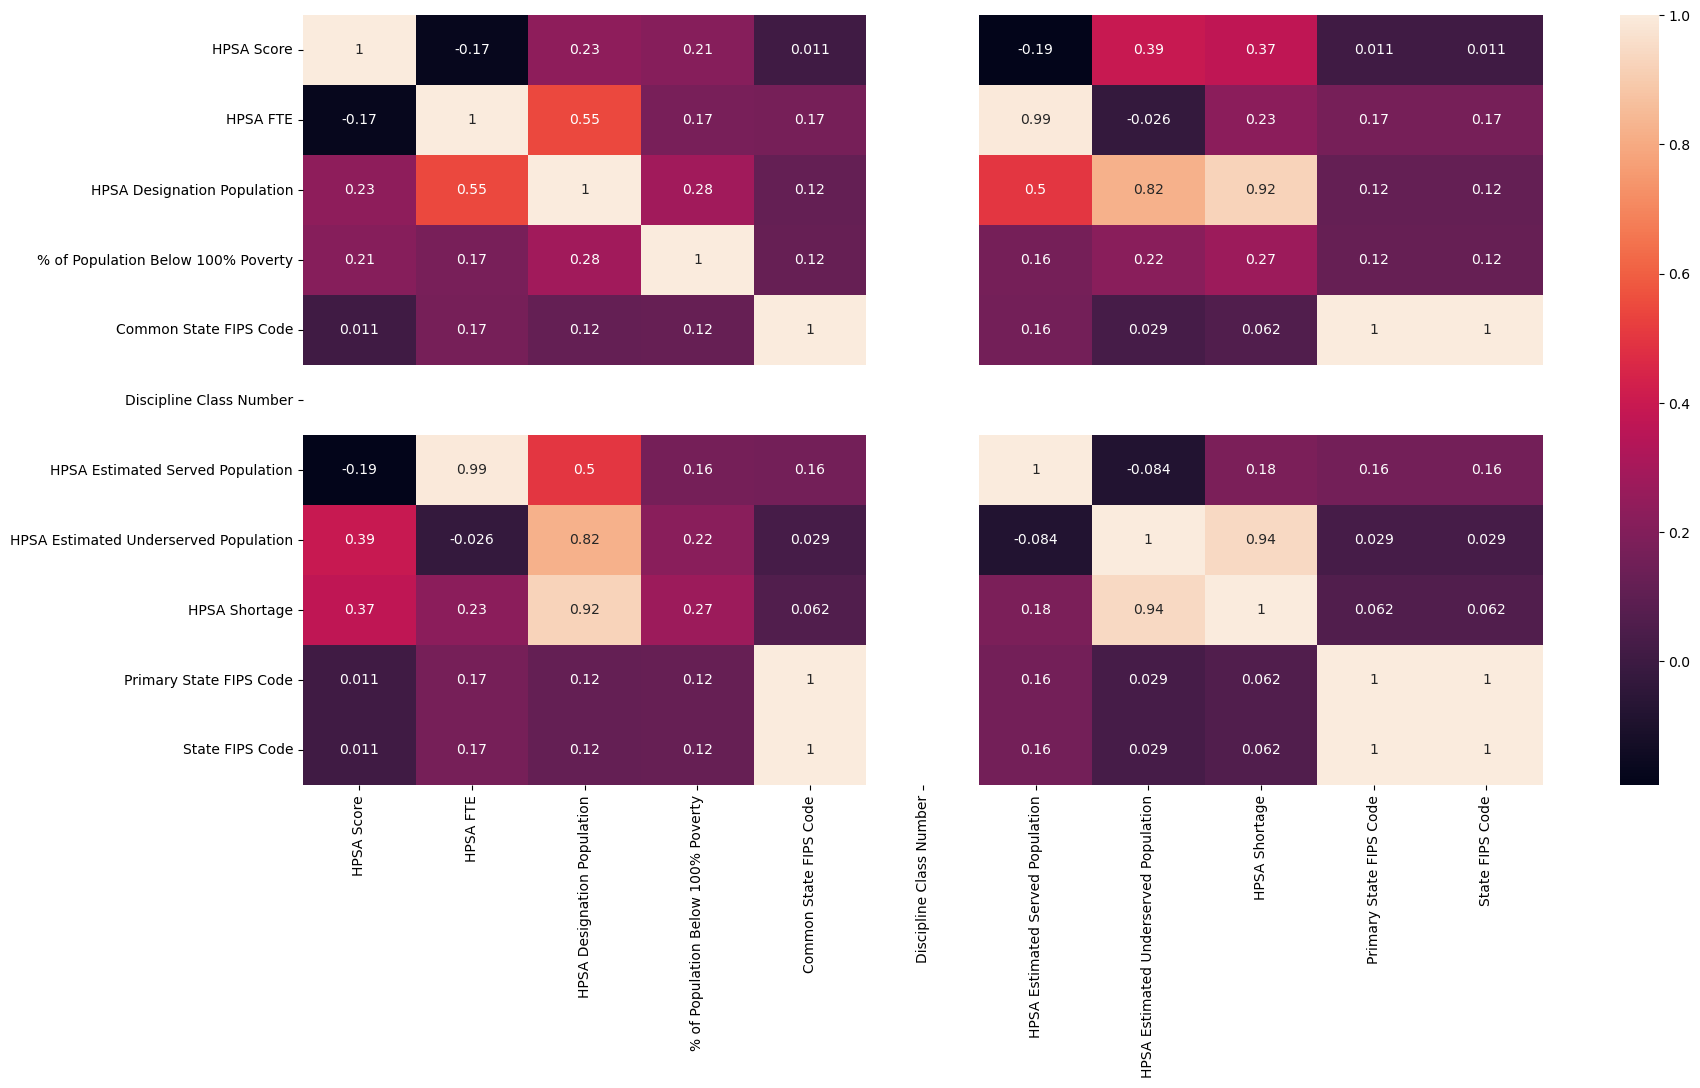

In [389]:
sns.heatmap(DH_NEW.corr(),annot=True)

<AxesSubplot:>

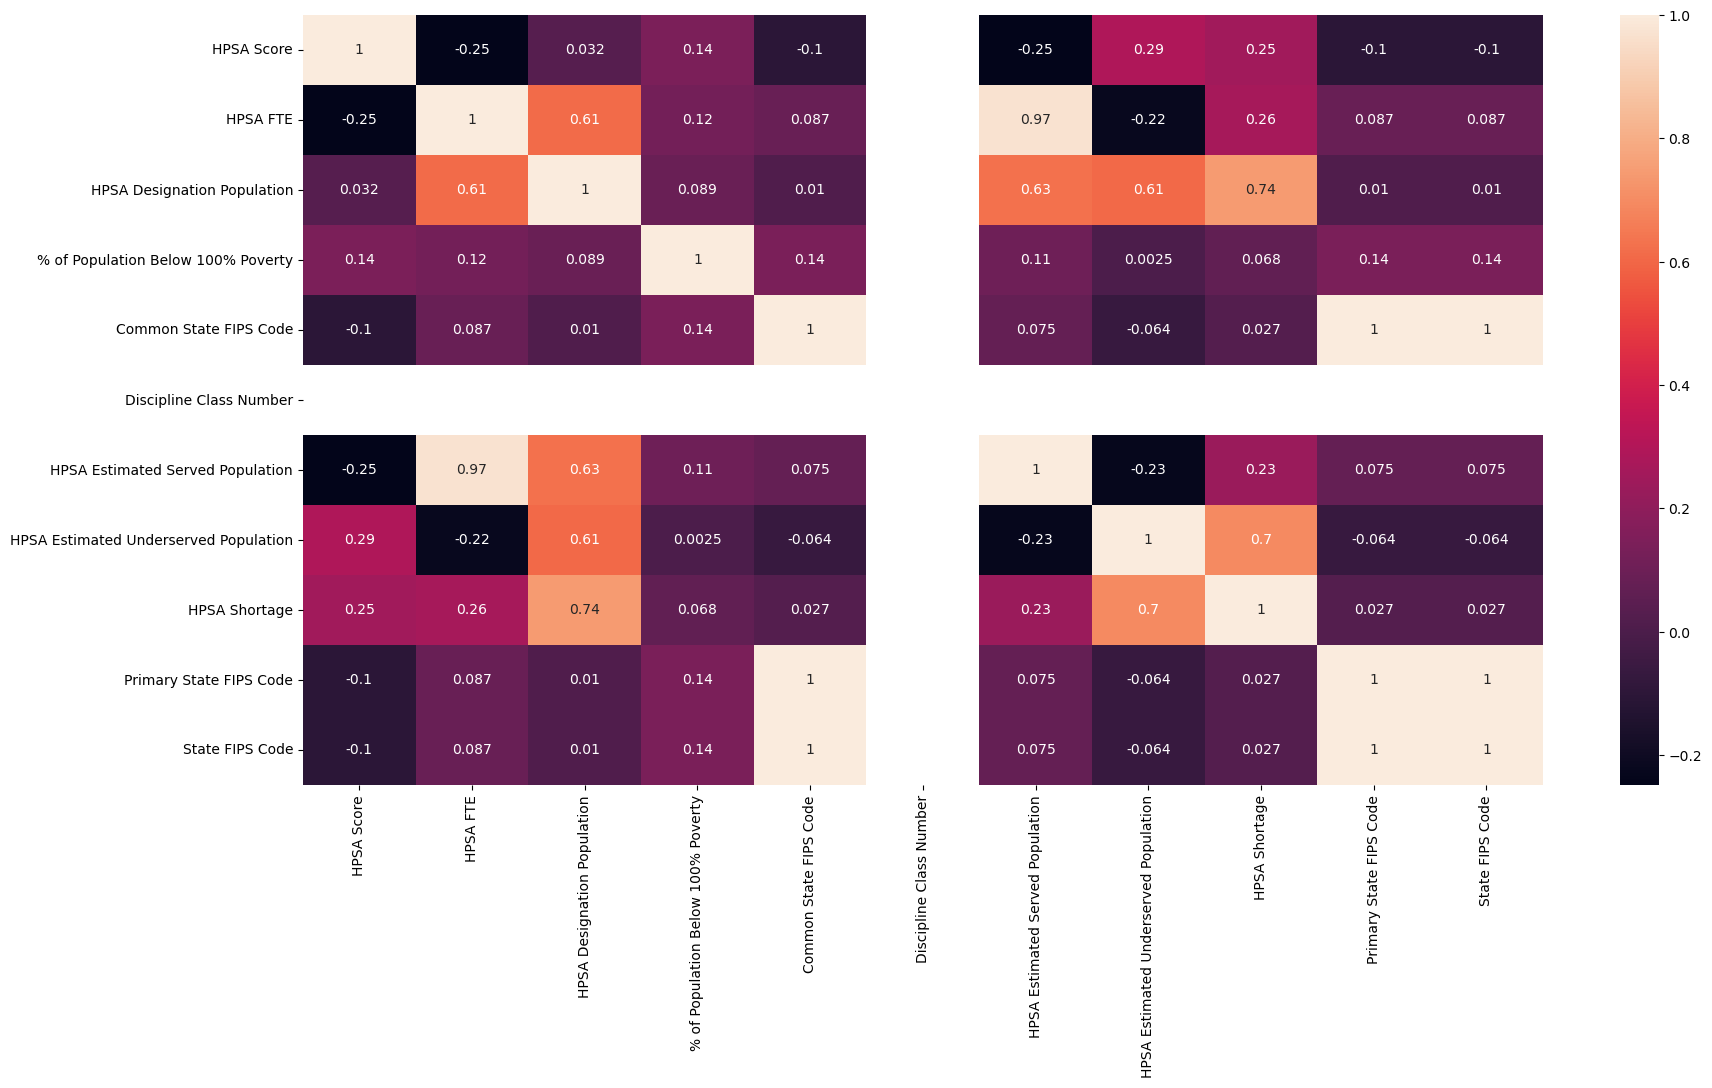

In [390]:
sns.heatmap(MH_NEW.corr(),annot=True)

<AxesSubplot:>

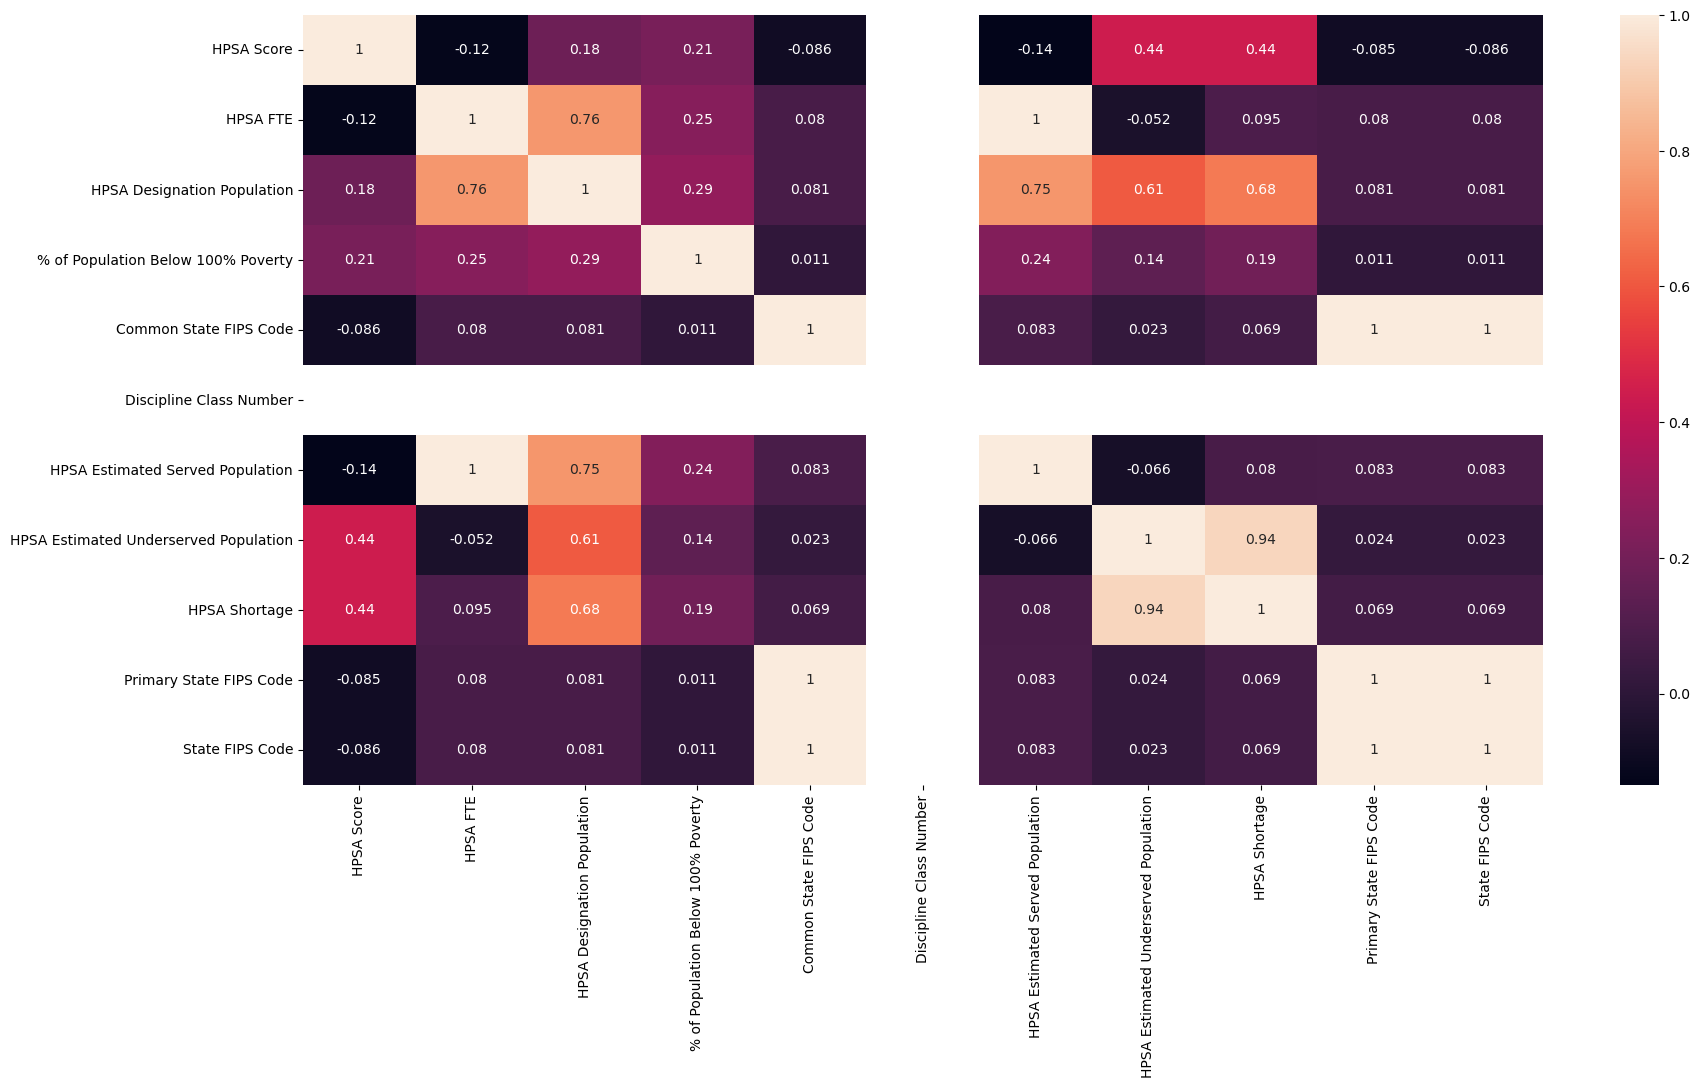

In [391]:
sns.heatmap(PC_NEW.corr(),annot=True)

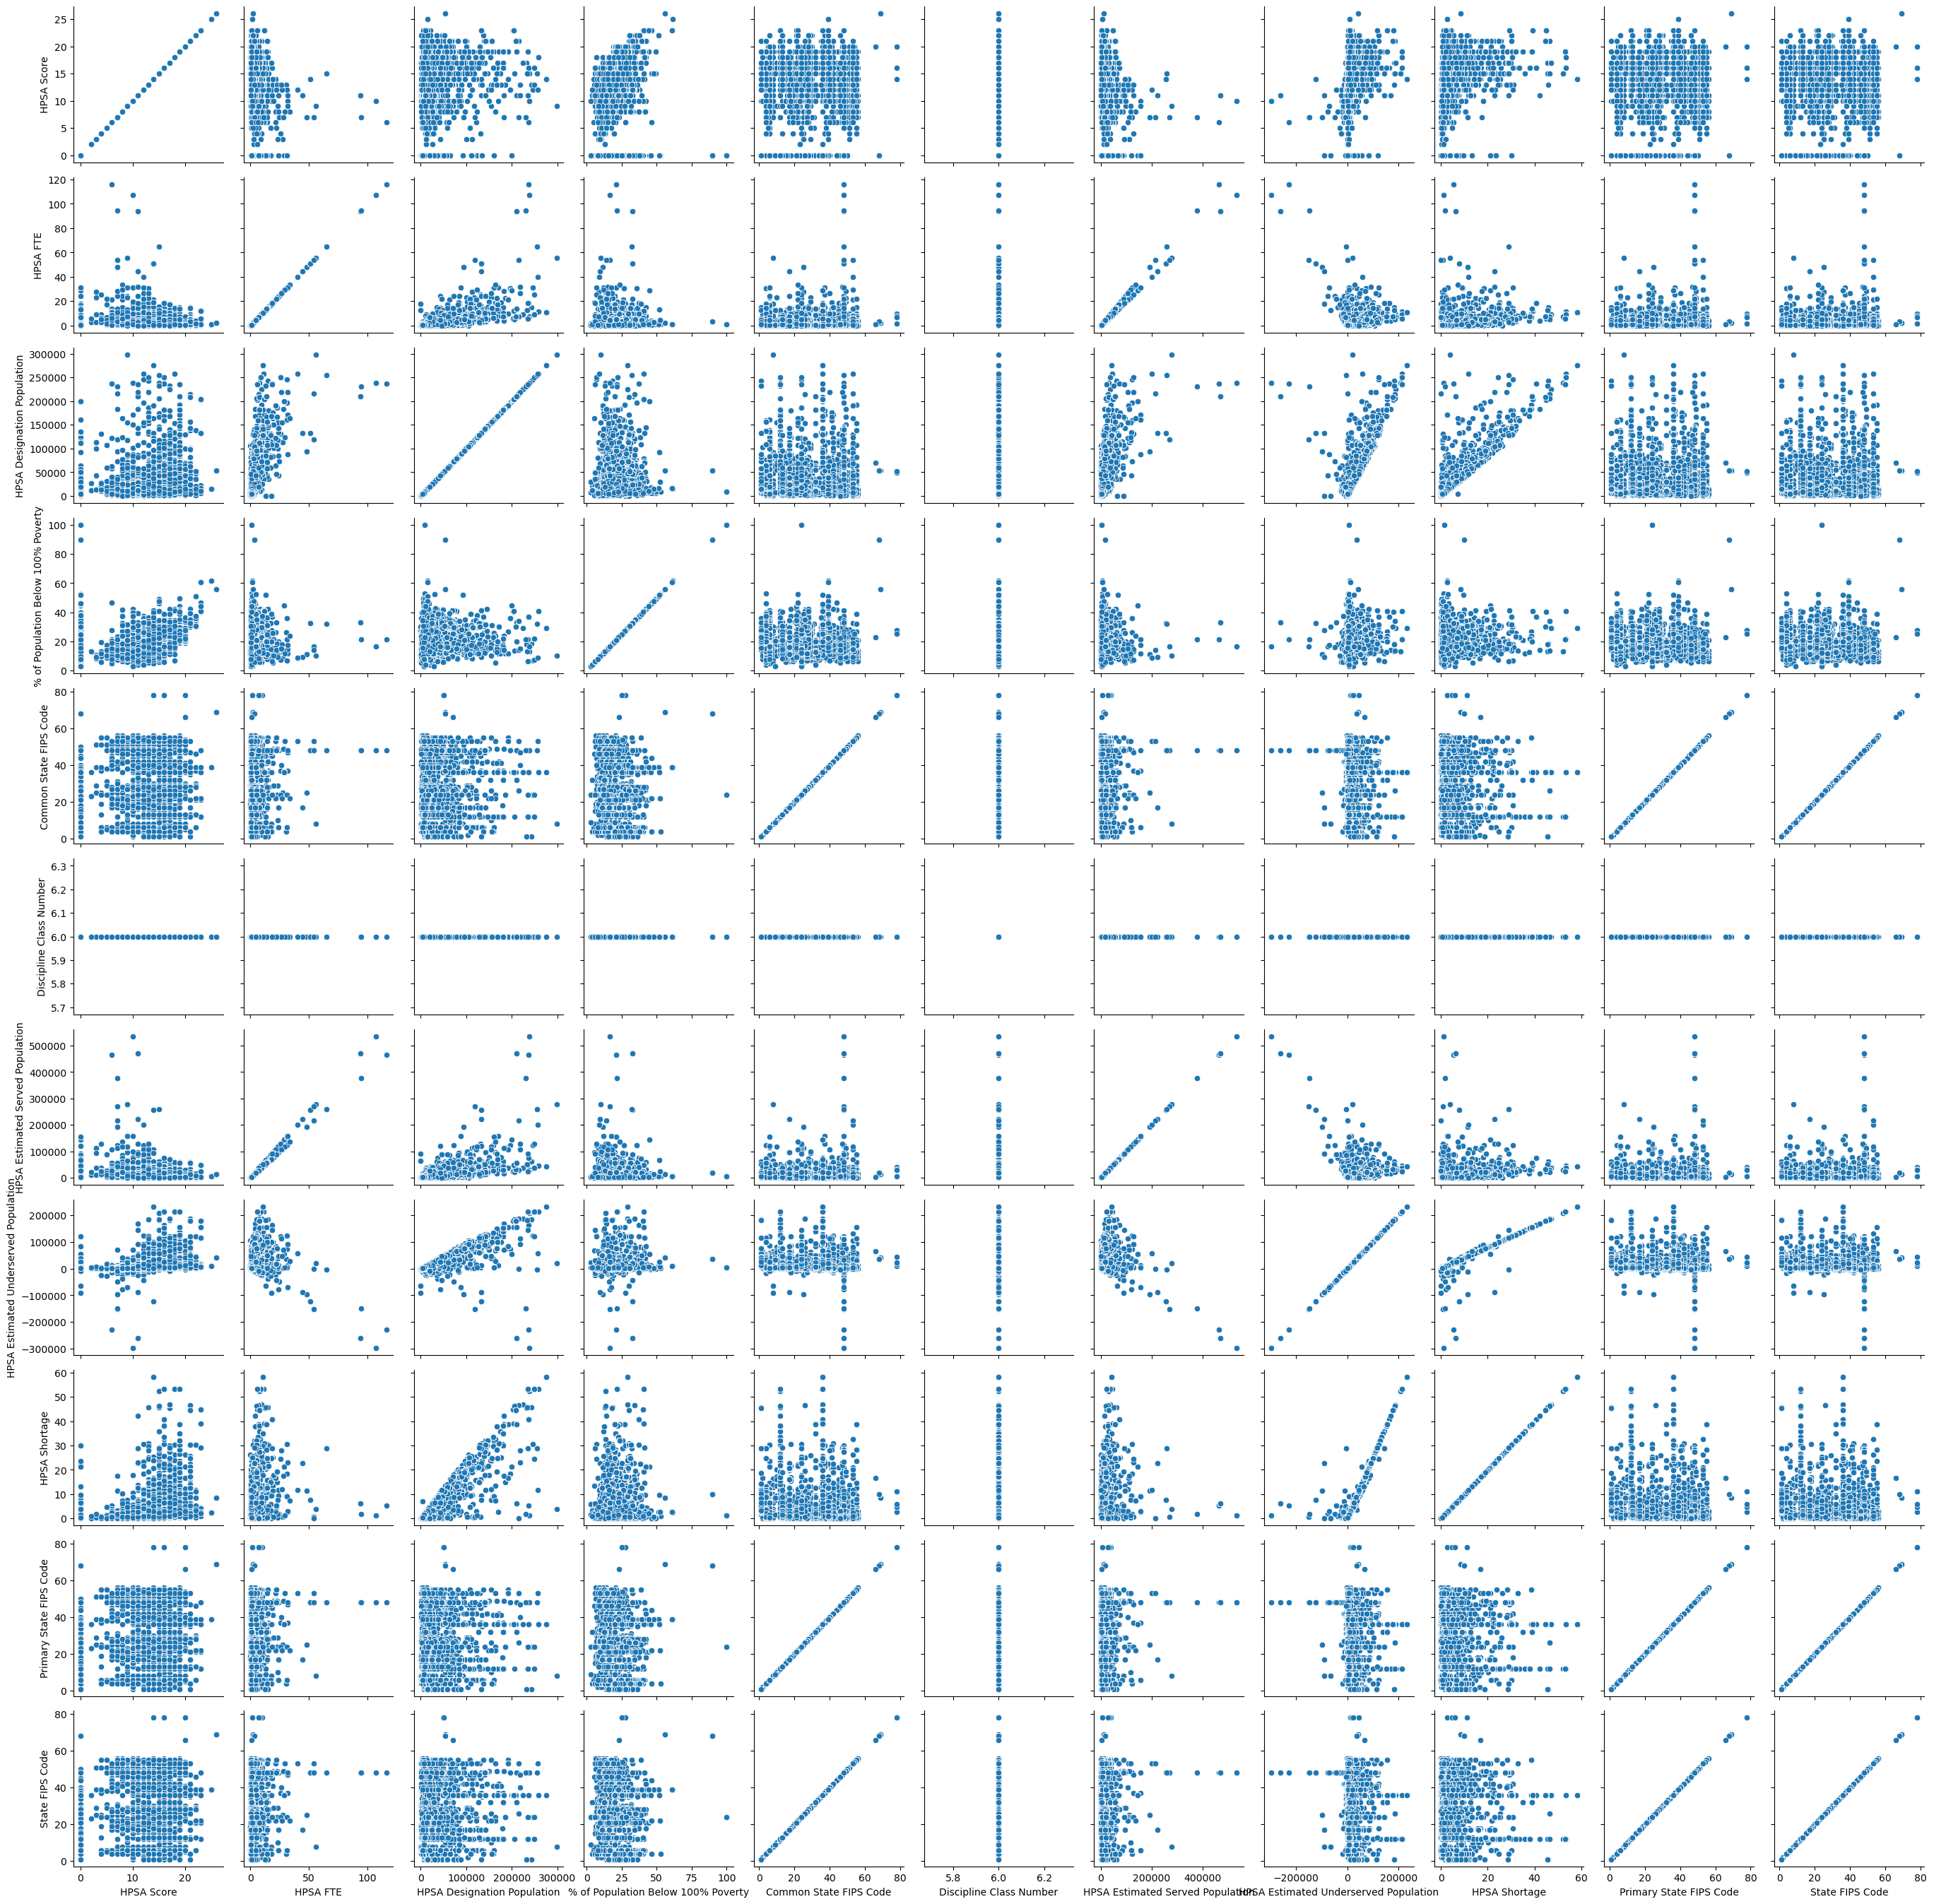

In [88]:
g = sns.PairGrid(DH_NEW)
g.map(sns.scatterplot)

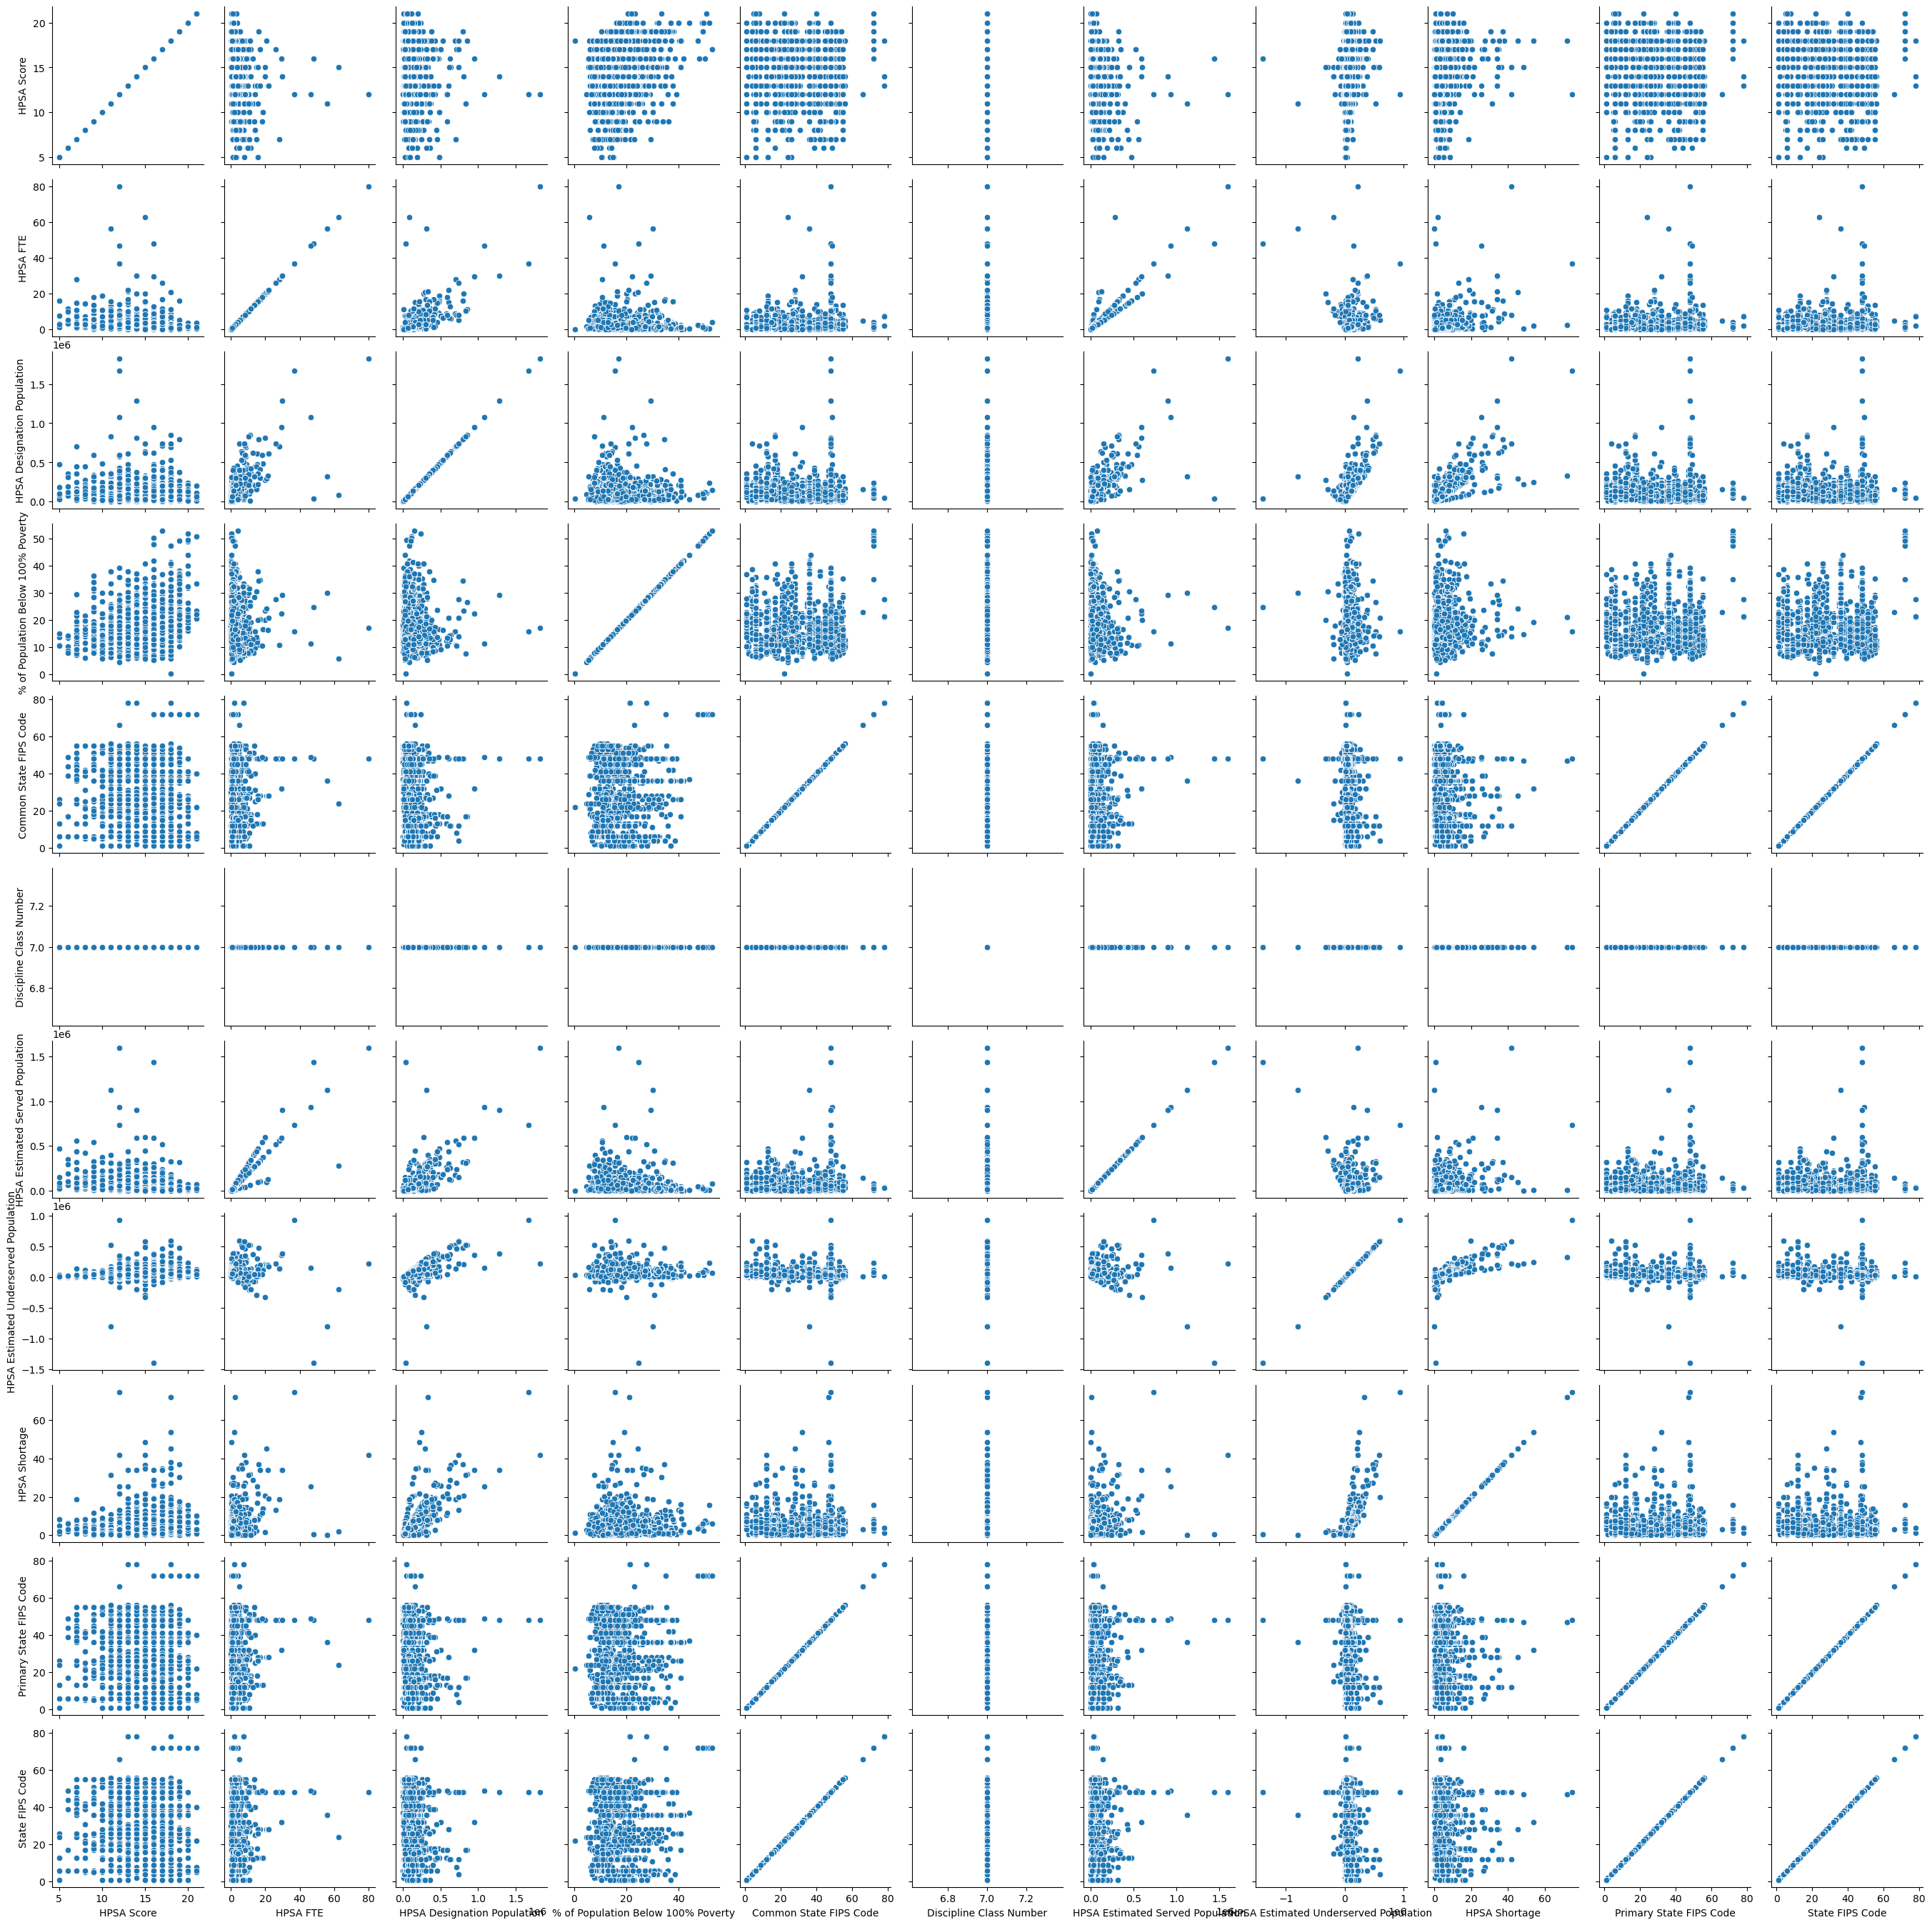

In [89]:
g = sns.PairGrid(MH_NEW)
g.map(sns.scatterplot)

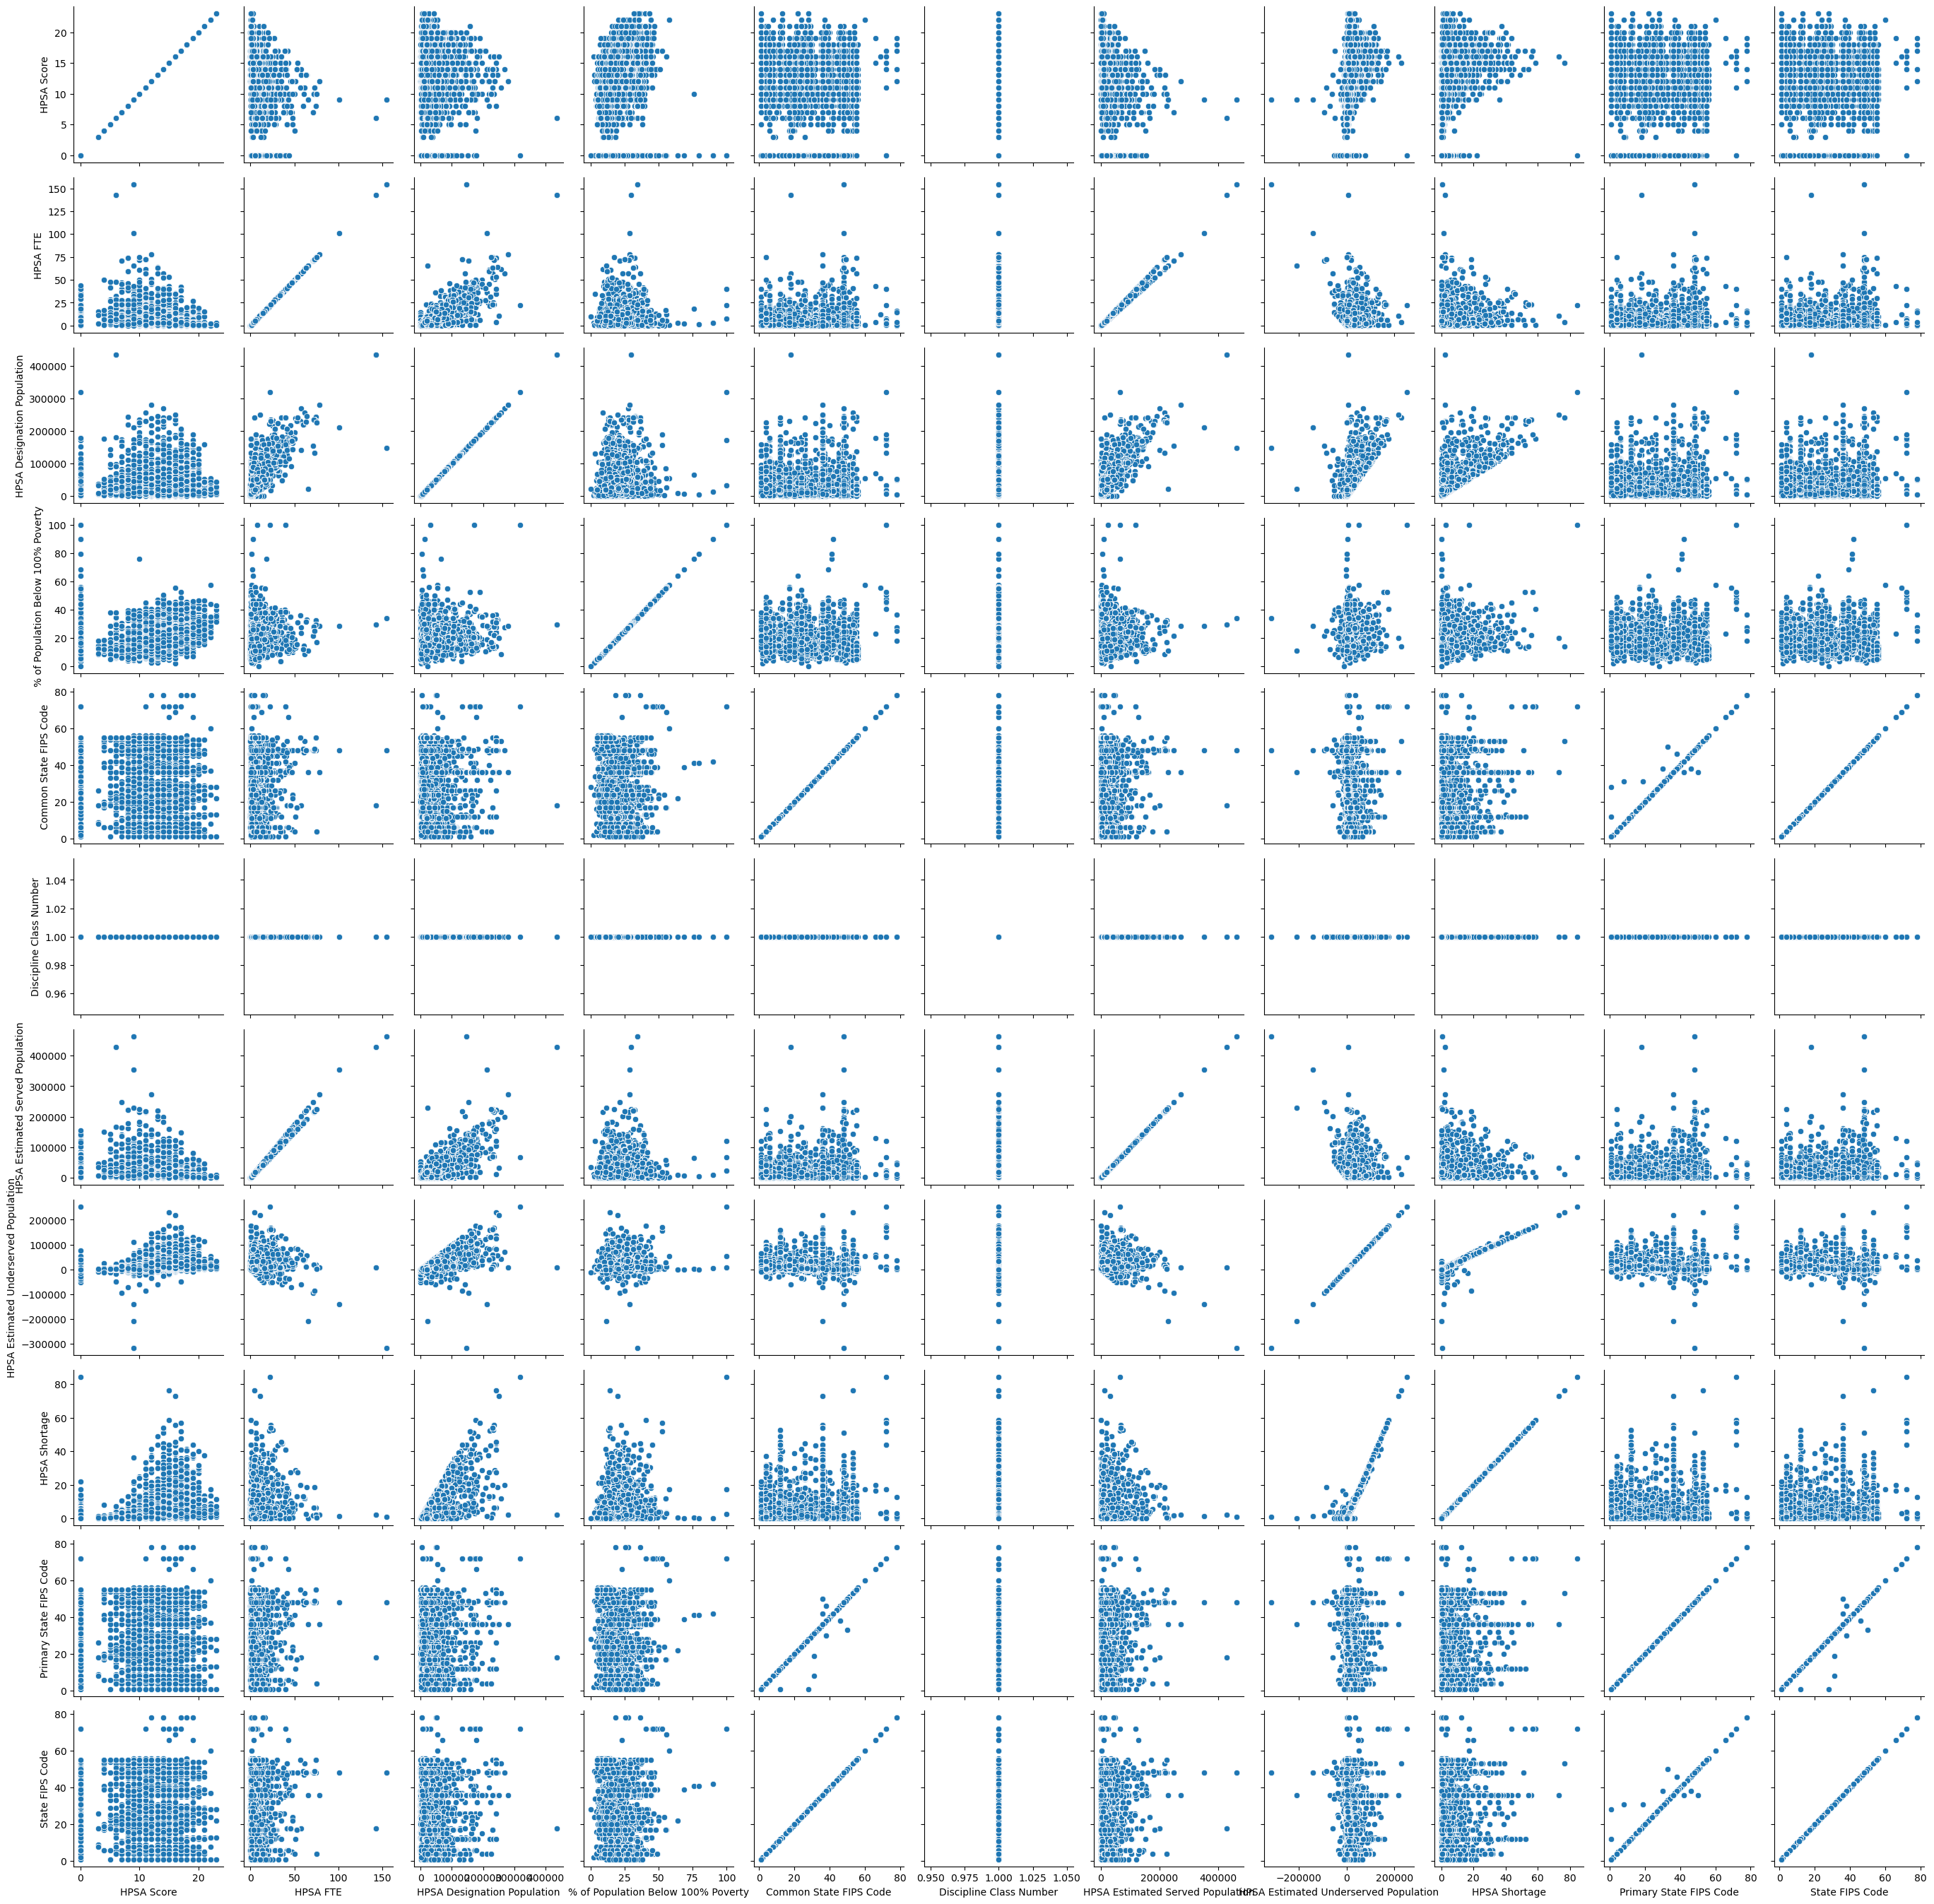

In [90]:
g = sns.PairGrid(PC_NEW)
g.map(sns.scatterplot)

In [392]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from keras.callbacks import EarlyStopping


## Dental Health

In [393]:
X = DH_NEW.drop(columns = ['HPSA Shortage'])
y = DH_NEW['HPSA Shortage']
labelencoder = LabelEncoder()
for i in X.select_dtypes(include=['object']).columns.tolist():
    X[i] = labelencoder.fit_transform(X[i])

In [394]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [395]:
clf = LinearRegression()
clf.fit(X_train,y_train)
y = clf.predict(X_test)
clf.score(X_test, y_test)

0.9817887156919357

In [396]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=50,
                    batch_size=50,
                    verbose=1)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 1000)              51000     
                                                                 
 dense_27 (Dense)            (None, 500)               500500    
                                                                 
 dense_28 (Dense)            (None, 250)               125250    
                                                                 
 dense_29 (Dense)            (None, 1)                 251       
                                                                 
Total params: 677,001
Trainable params: 677,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
269/269 [==============================] - 2s 7ms/step - loss: 12.0800 - mae: 2.1044 - val_loss: 5.4282 - val_mae: 1.8042
Epoch 2/50
269/269 [==========================

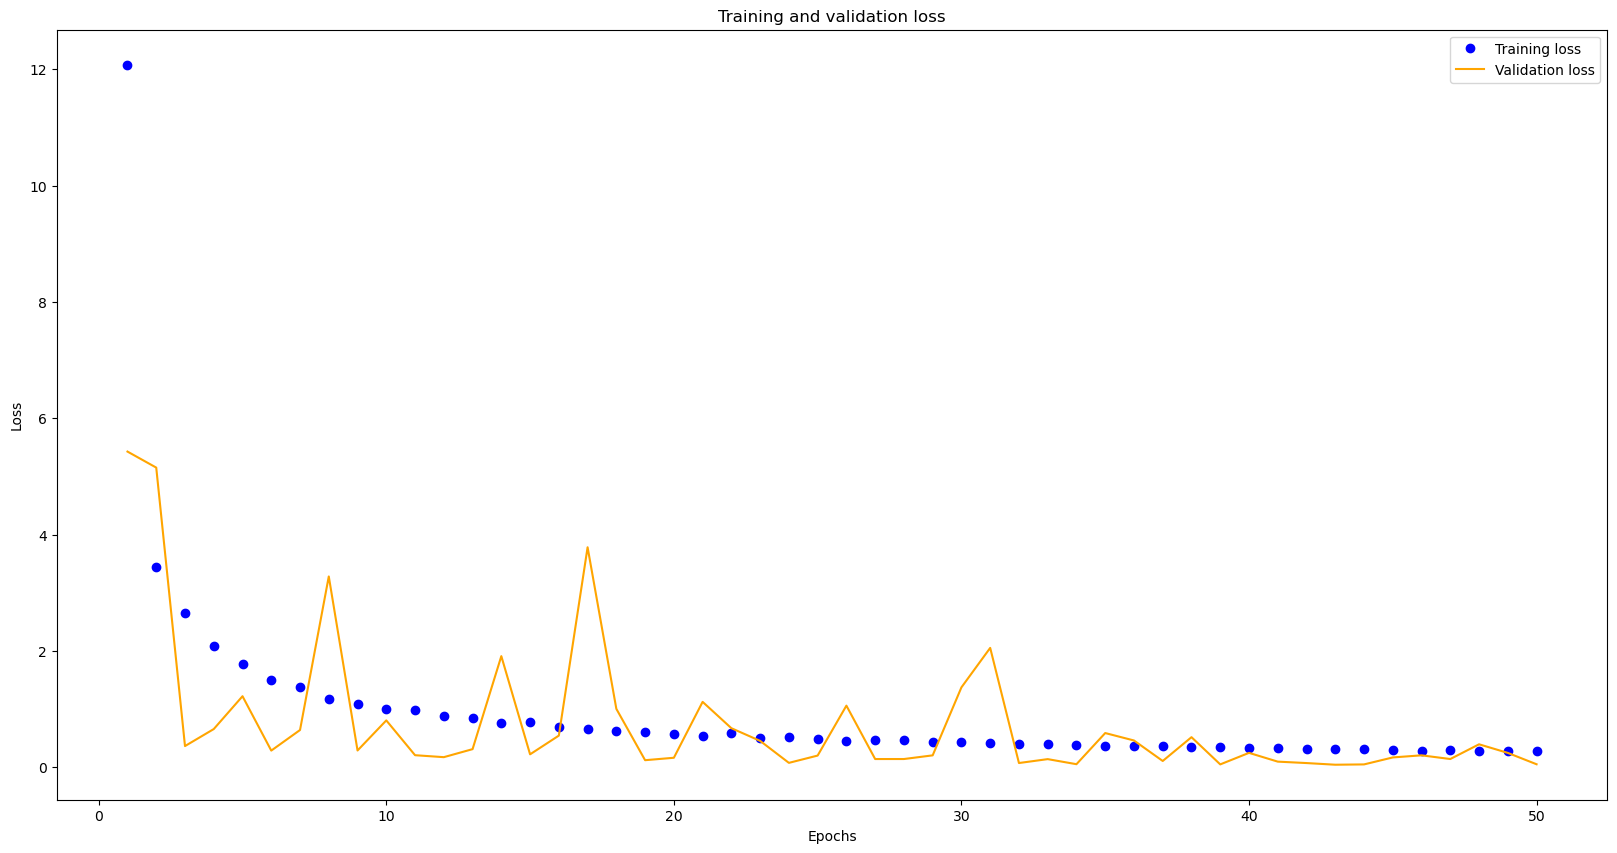

In [397]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

105/105 [==============================] - 0s 2ms/step


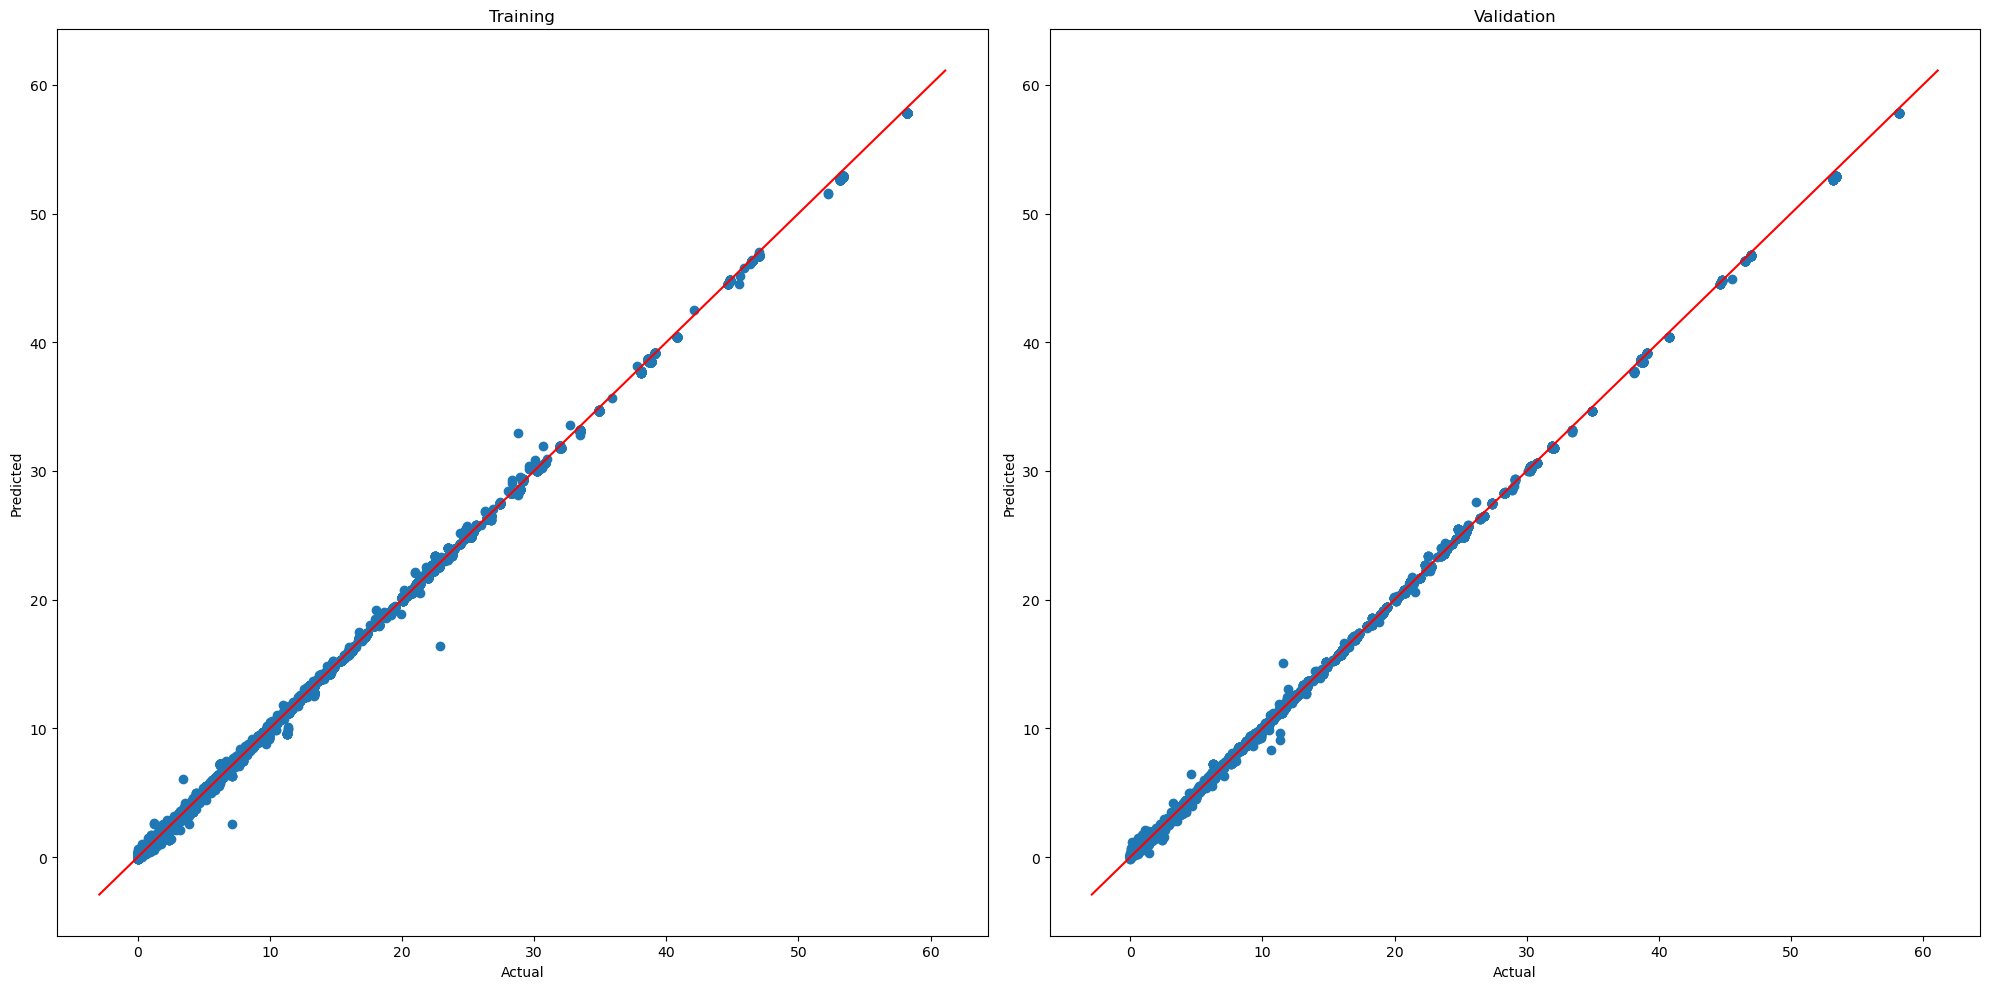

In [398]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [399]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

420/420 [==============================] - 1s 2ms/step
0.14606158631604277
0.15091817670253752


## Mental Health

In [411]:
X = MH_NEW.drop(columns = ['HPSA Shortage'])
y = MH_NEW['HPSA Shortage']
labelencoder = LabelEncoder()
for i in X.select_dtypes(include=['object']).columns.tolist():
    print(i)
    X[i] = labelencoder.fit_transform(X[i])


(16352, 50)
HPSA Name
HPSA ID


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [414]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: '73699936G1'

In [ ]:
clf = LinearRegression()
clf.fit(X_train,y_train)
y = clf.predict(X_test)
clf.score(X_test, y_test)

In [ ]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=50,
                    batch_size=50,
                    verbose=1)

In [ ]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

## Personal Health

In [415]:
X = PC_NEW.drop(columns = ['HPSA Shortage'])
y = PC_NEW['HPSA Shortage']
labelencoder = LabelEncoder()
for i in X.select_dtypes(include=['object']).columns.tolist():
    X[i] = labelencoder.fit_transform(X[i])

In [416]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [417]:
clf = LinearRegression()
clf.fit(X_train,y_train)
y = clf.predict(X_test)
clf.score(X_test, y_test)

0.9232312093072915

In [418]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=50,
                    batch_size=50,
                    verbose=1)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 1000)              52000     
                                                                 
 dense_31 (Dense)            (None, 500)               500500    
                                                                 
 dense_32 (Dense)            (None, 250)               125250    
                                                                 
 dense_33 (Dense)            (None, 1)                 251       
                                                                 
Total params: 678,001
Trainable params: 678,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
496/496 [==============================] - 4s 6ms/step - loss: 8.6701 - mae: 1.6841 - val_loss: 2.6279 - val_mae: 1.2130
Epoch 2/50
496/496 [===========================

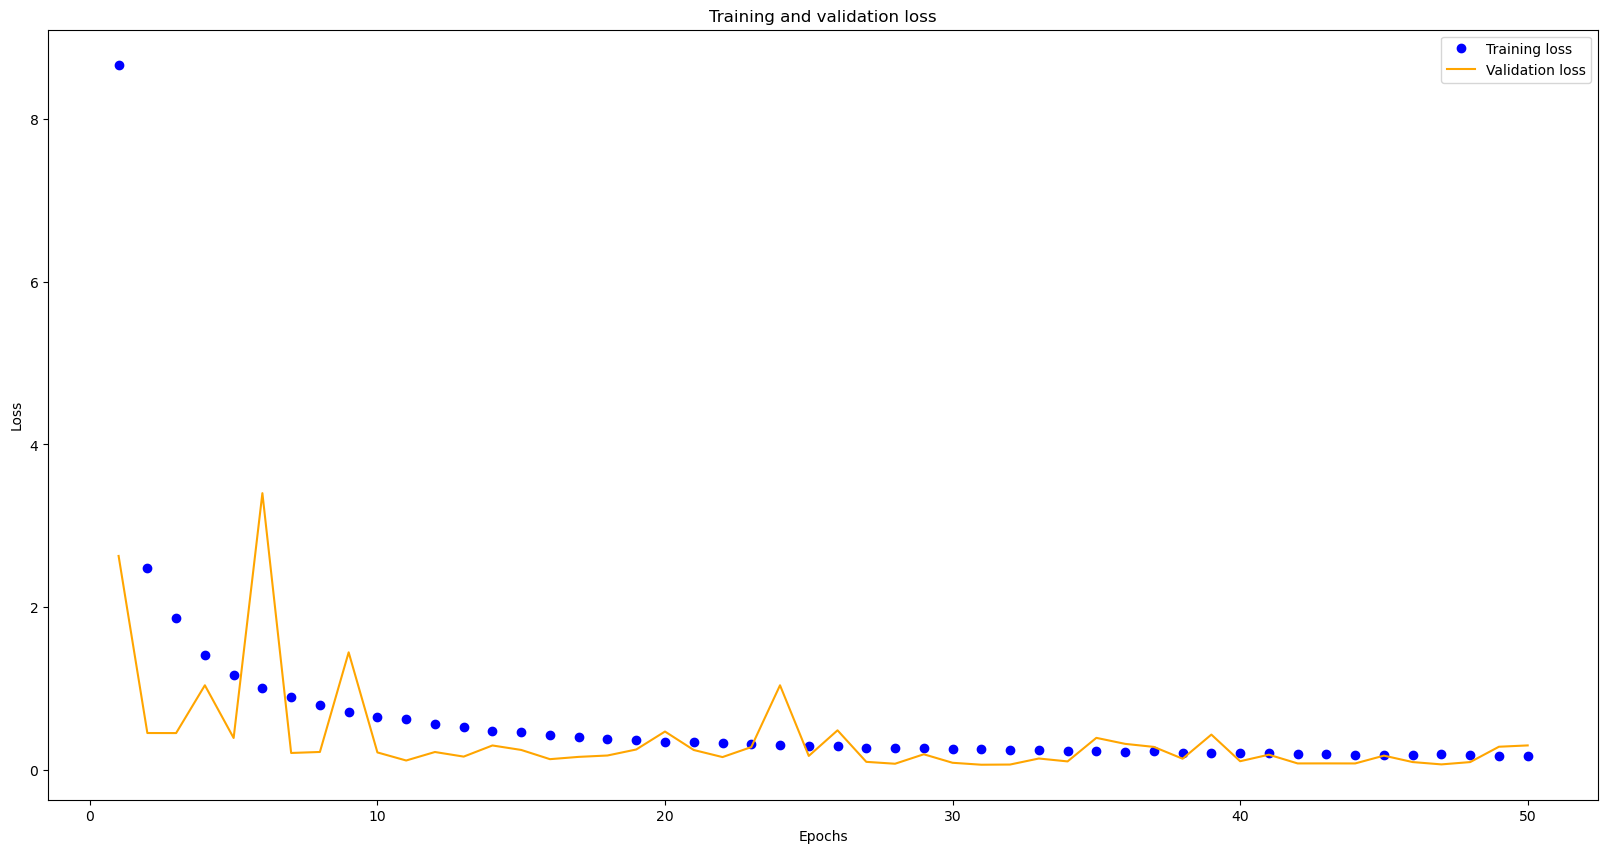

In [419]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

194/194 [==============================] - 0s 2ms/step


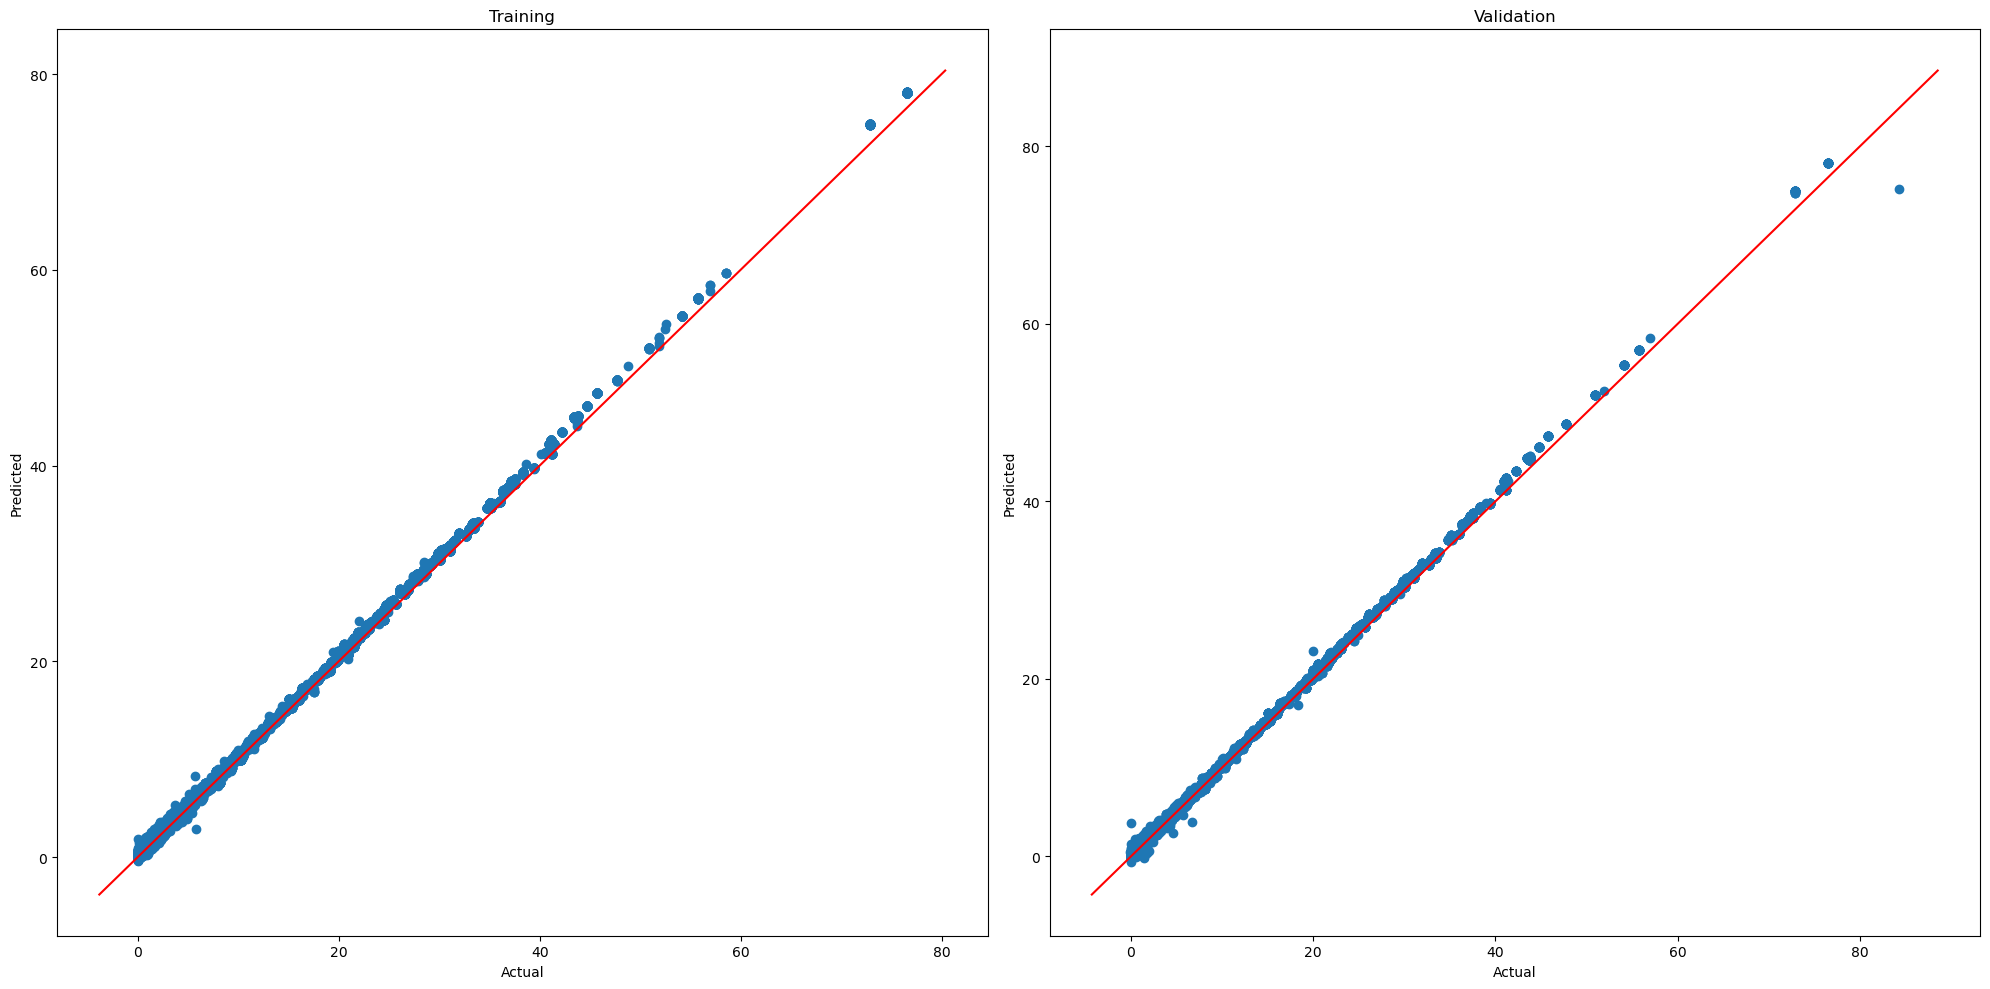

In [420]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [421]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

775/775 [==============================] - 2s 2ms/step
0.37347262528591546
0.3875126811135074
